# 퍼셉트론 구현 - 텐서플로우 2

관심 있는 학생만 살펴보기 바랍니다.

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.__version__

'2.1.0'

## 데이터

In [3]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.expand_dims(np.array([0, 1, 1, 0]), axis=-1)

In [4]:
print(X.shape, y.shape)

(4, 2) (4, 1)


## 모델 구조 정의
텐서플로우 2는 고수준 API로 기본 제공하는 케라스를 이용하여 구현 가능

여기서도 텐서플로우 1에서 했던 것과 동일하게 퍼셉트론 구조는 은닉층에 뉴런 3개, 마지막 출력은 뉴런 1개를 가지고,

각각의 레이어 사이는 시그모이드 활성함수를 쓰기로 하자.

In [5]:
from tensorflow.keras import models, layers, losses, optimizers

In [6]:
class Perceptron(models.Model):

    # 파이썬에서 object 를 상속받아 만들어진 클래스를 생성할 때
    # 초기화 과정에서 무슨 일이 일어나는지는 __init__ 안에서 정해줌
    def __init__(self):
        
        # models.Model를 상속 받아서 동일한 방법으로 초기화
        super(Perceptron, self).__init__()
        
        # models.Sequential 안에 레이어를 한층 한층 쌓아가며 만들 수 있음
        self.model = models.Sequential([
            # 입력은 어떤 모양의 데이터가 들어올지 모르지만
            # Perceptron 클래스를 생성하고, build하는 과정에서
            # 가중치 행렬(텐서) 차원이 정해짐
            # layers.Dense() 는 TF1에서 W, b와 역할이 동일
            layers.Dense(3), # 뉴런 3개 가짐
            layers.Activation(tf.sigmoid), # 시그모이드 활성함수 사용
            layers.Dense(1), # 출력 뉴런 1개
            layers.Activation(tf.sigmoid) # 시그모이드 활성함수 사용
        ])

    # 파이썬에서 생성된 클래스에 인자를 전달할 때 호출되는 함수는 __call__인데
    # 텐서플로우 2에서 models.Model 클래스에 call함수가 __call__을 호출하도록 되어 있음
    # 그래서 모델에 데이터를 전달하면 무슨 일이 생기는지는 여기서 정해주면 됨
    def call(self, inputs):
        '''
            데이터를 입력받아서 어떤 텐서 연산을 거쳐 출력되는지 정해줌
            
            args:
                inputs: 입력 데이터. 모양(shape)은 call할 때 정해짐
            return:
                모델이 출력하는 값
        '''
        outputs = self.model(inputs)
        return outputs

In [7]:
# Perceptron 클래스 생성
perceptron = Perceptron()

In [8]:
# 생성 된 퍼셉트론에 어떤 모양의 데이터가 들어갈지 정해줌
perceptron.build((None, 2))

## 목적식 정의
MSE를 써서 목적식을 최소화 하기로 함

In [9]:
mse = losses.MeanSquaredError()

## 최적화기
어떤 방식으로 모델 가중치를 업데이트할지 정함

In [10]:
optimizer = optimizers.SGD(learning_rate=.1)

## 학습

In [11]:
%%time

EPOCHS = 20000

loss_list = []

for e in range(EPOCHS):
    
    idx = np.random.randint(4)
    
    # 임의로 데이터 한 개 선택
    _x = X[idx:idx+1]
    _y = y[idx:idx+1]
    
    # backpropagation 을 위해 W, b에 관해 미분해야함
    # tf.GradientTape()가 자동 미분기 역할을 함
    # 이 블록 안에서 무엇에 관해 미분할지 텐서플로우가 쳐다 봄
    with tf.GradientTape() as tape:
        # 퍼셉트론에 데이터 넣어서 결과 출력하기
        _y_pred = perceptron(_x)
        # 목적식 적용. 이걸 최소화하도록 미분하기로 함
        loss = mse(_y, _y_pred)
        
    # 미분 하기
    # "loss"를 "perceptron.trainable_variables" 로 미분
    grads = tape.gradient(loss, perceptron.trainable_variables)
    
    # 가중치 (perceptron.trainable_variables) 를 업데이트
    optimizer.apply_gradients(list(zip(grads, perceptron.trainable_variables)))
    
    loss_list.append(loss)

Wall time: 1min 7s


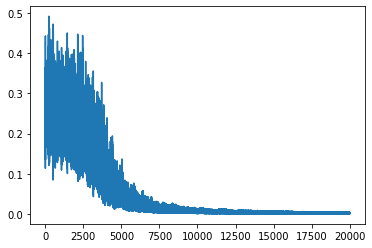

In [12]:
# 만 번 학습하는 동안 로스 변화를 그래프로 그려보기
plt.plot(loss_list)
plt.show()

## 모델 평가

In [13]:
y_pred = perceptron(X)

In [14]:
for y_real, y_ in zip(y, y_pred):
    print(f"실제: {y_real[0]}, 예측: {y_[0]:.1f}")

실제: 0, 예측: 0.0
실제: 1, 예측: 0.9
실제: 1, 예측: 0.9
실제: 0, 예측: 0.1
